In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('Processed_tweets')

In [3]:
df.head()

,Text,Sentiments
0,pl arrange fr…,neutral
1,covid i’d like 6 hours please alter…,neutral
2,yes bad covid seasons going forward treat viru...,negative
3,covid avoid flu respiratory illnesses want t…,negative
4,wisconsin reported 1300 new covid19 cases 2nd ...,positive


In [4]:
TF_IDF = TfidfVectorizer().fit_transform(df['Text'].values.astype('U'))
#this will vectorize the text

In [5]:
TF_IDF.toarray().shape

(2685, 6519)

In [6]:
vector_df = pd.DataFrame(TF_IDF.toarray())     
#coped vectorized array into dataframe vector_df

In [7]:
#vector_df['Sentiments'] = LabelEncoder().fit_transform(df['Sentiments'])
vector_df['Sentiments'] = df['Sentiments']

In [8]:
# we encoded output in numbers 0,1,2 for positive,negative and neutral sentiment
vector_df.head()

,0,1,2,3,4,5,6,7,8,9,...,6510,6511,6512,6513,6514,6515,6516,6517,6518,Sentiments
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive


In [9]:
X = vector_df.drop('Sentiments',axis=1)
Y = vector_df['Sentiments']

In [20]:
#test set of 20% data and train set contain 80%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=12)

In [21]:
print(X_train.head())
print(X_train.shape)

      0     1     2     3     4     5     6     7     8     9     ...  6509  \
1893   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
918    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
241    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1840   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2559   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

      6510  6511  6512  6513  6514  6515  6516  6517  6518  
1893   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
918    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
241    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1840   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2559   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 6519 columns]
(2148, 6519)


In [22]:
from sklearn.svm import SVC

In [23]:
from sklearn.metrics import classification_report

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [25]:
#SVM
model_svm = SVC()

In [26]:
model_svm.fit(X_train, Y_train)
model_svm.score(X_test, Y_test)
f1_score(Y_test, model_svm.predict(X_test), average='macro')
y_pred_svm = model_svm.predict(X_test)
print(classification_report(Y_test, y_pred_svm))

              precision    recall  f1-score   support

    negative       0.85      0.30      0.44       117
     neutral       0.62      0.87      0.72       217
    positive       0.72      0.69      0.71       203

    accuracy                           0.68       537
   macro avg       0.73      0.62      0.62       537
weighted avg       0.71      0.68      0.66       537



In [27]:
from matplotlib import pyplot as plt

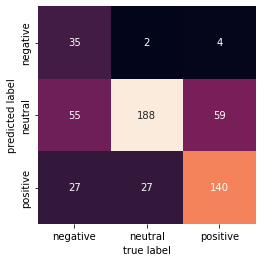

In [28]:
mat = confusion_matrix(Y_test, y_pred_svm)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['negative','neutral','positive'],
            yticklabels=['negative','neutral','positive'])
plt.xlabel('true label')
plt.ylabel('predicted label');